In [2]:
import pandas as pd
from pandas_analysis import load_all_csv, IATA_TO_NAME
import matplotlib.pyplot as plt

In [1]:
data = load_all_csv()
data['departure_date'] = pd.to_datetime(data['departure_date'])
data = data.drop_duplicates(subset=['flight_id', 'departure_date'])
data['week_number'] = data['departure_date'].dt.isocalendar().week

unique_airlines = data['airline_iata_code'].unique()

NameError: name 'load_all_csv' is not defined

In [7]:
def plot_airline_chart(airline_data, airline_code):
    grouped_data = airline_data.groupby(['arrival_airport_iata_code', 'week_number']).size().reset_index(name='count')
    weekly_data = grouped_data.groupby('arrival_airport_iata_code')['count'].mean().reset_index()
    
    ax = weekly_data.plot(x='arrival_airport_iata_code', y='count', kind='bar', figsize=(8, 6))
    plt.ylabel('Aantal Vluchten per Week')
    plt.xlabel('Bestemming IATA Code')
    plt.title(f'Aantal Vluchten per Week voor {IATA_TO_NAME[airline_code]} per Bestemming')
    plt.show()

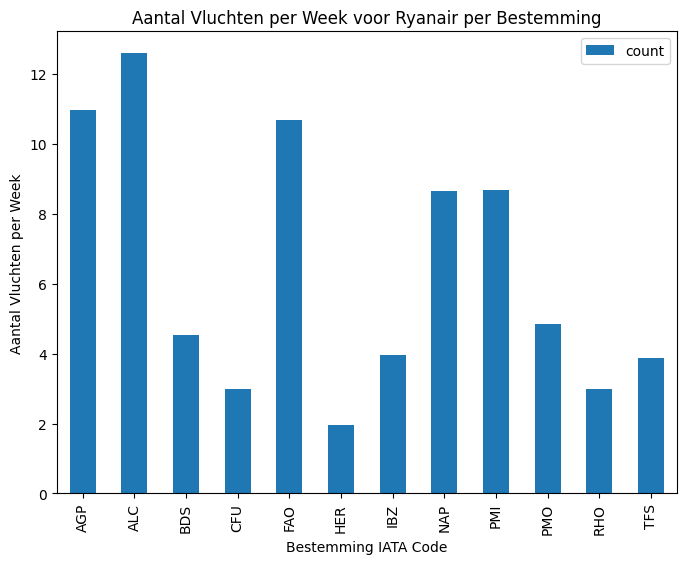

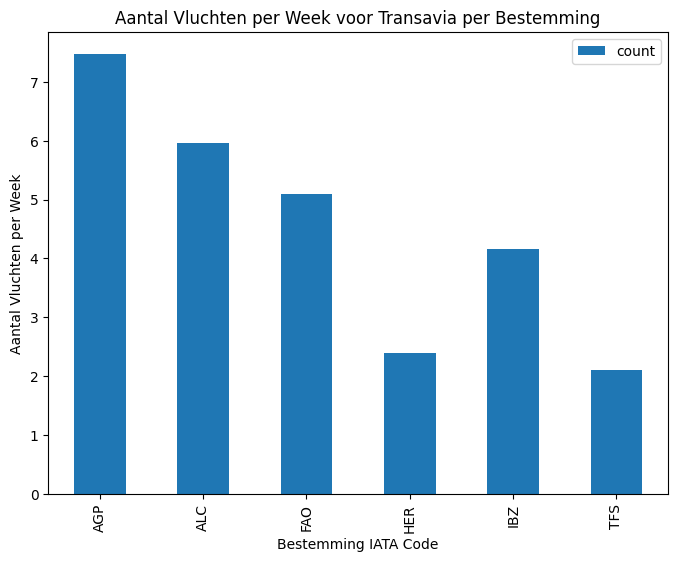

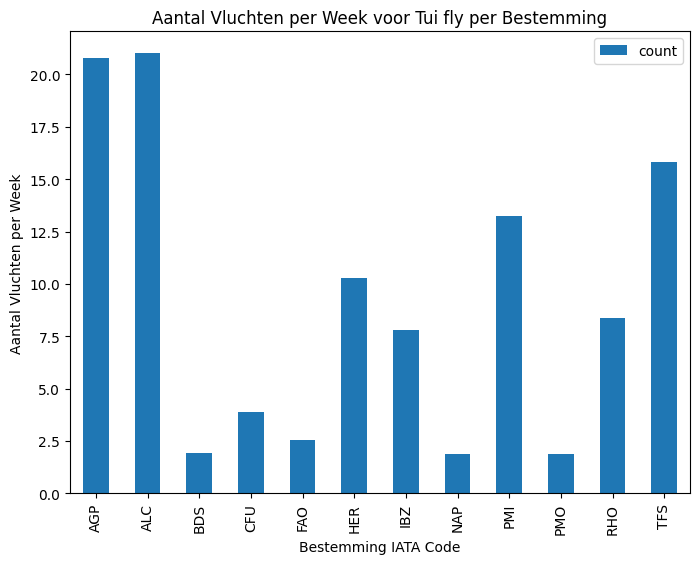

In [8]:
for airline_code in unique_airlines:
    airline_data = data[data['airline_iata_code'] == airline_code]
    plot_airline_chart(airline_data, airline_code)